In [2]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
#Do for 1 proton moving. Then, try to create some kind of distribution for the protons.
#Then, vary distance r, since the electron only sees the inside of the distribution.

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [89]:
#Define constants
e = 1.6*1e-19 #C
c = 3.*1e8 #m/s
vr_electron = 10.
vz_electron = 0.
beta_proton = 0.99
beta_el = 0.001
vr_proton=0.
vz_proton = c
me = 9.1*1e-31 #kg/ms
u0 = np.pi*4.
Ip = 10.
r0 = 1.e-2 #0.01m, initial radial position of e-


In [90]:
#e- starts at z=0, r=r0, vz=0,vr=vr
#proton starts at z=0,r=0, vz=beta*c
nsteps = 100

K=4.5*1e-8


In [91]:
list_posz=[]
vr=0.
r = 1.e-2
ar=0.
deltaz = 0.001
epsilon=1.e-5
z=0.
time_elapsed=datetime.datetime.now()
for step in range(100000):
    if r<epsilon:
        print 'epsilon'
        print 'final time: '+str(z)
        print 'time elapsed: '+str(datetime.datetime.now()-time_elapsed)
        break
    #calculate r coord
    ar = -1.*K/r
    r += vr*deltaz
    vr += ar*deltaz
    z += deltaz
    
    list_posz.append([r,vr,ar,z])

epsilon
final time: 59.072
time elapsed: 0:00:00.175310


59.072
nsteps: 59072


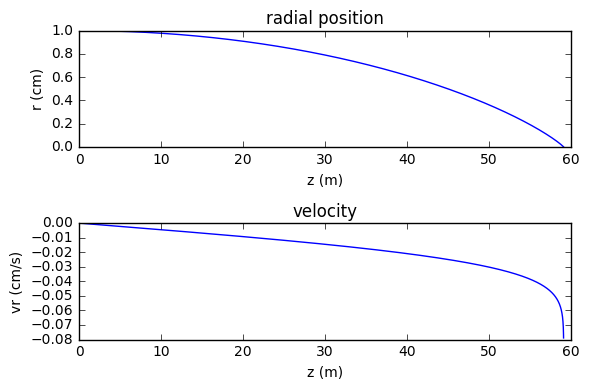

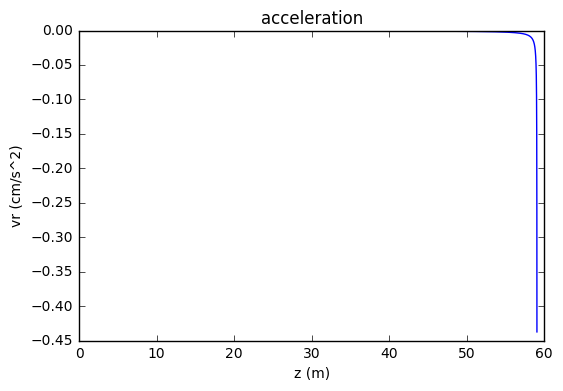

In [92]:
print list_posz[-1][-1]
print 'nsteps: '+str(len(list_posz))
plt.subplot(211)
plt.title('radial position')
plt.plot(np.array(list_posz)[:,3],np.array(list_posz)[:,0]*1.e2)
plt.xlabel('z (m)')
plt.ylabel('r (cm)')
#
plt.subplot(212)
plt.plot(np.array(list_posz)[:,3],np.array(list_posz)[:,1]*1e2)
#plt.plot(np.array(list_posz)[:,0]*1e2,np.array(list_posz)[:,1]*1e2)
#plt.xlim([0.01,0.0000001])
plt.title('velocity')
plt.xlabel('z (m)')
plt.ylabel('vr (cm/s)')
plt.tight_layout()
plt.show()
#
plt.plot(np.array(list_posz)[:,3],np.array(list_posz)[:,2]*1e2)
#plt.plot(np.array(list_posz)[:,0]*1e2,np.array(list_posz)[:,1]*1e2)
#plt.xlim([0.01,0.0000001])
plt.title('acceleration')
plt.xlabel('z (m)')
plt.ylabel('vr (cm/s^2)')

plt.show()


In [ ]:
print list_posz[-1][-1]*3.e8
print list_posz[0]
print len(list_posz)

In [ ]:
59.07*3*1e8

In [ ]:
x=np.linspace(1.e-2,0.000001,100)
y = -1.*np.log(x)
plt.plot(x,y)
plt.xlim([1.e-2,0.000001])
plt.show()

# Derive electron + magnetic field for 1 proton (Lorentz force)

In [ ]:
# E = q_proton/(4pi*epsilon0)*gamma**2/ (1 - beta**2*sin(theta)**2)*r/abs(r**3)

In [56]:
#r = np.linspace(0.00001,1.,20)
#theta=np.linspace(0.,2*np.pi,20)
#z=np.linspace(0.,1.,20)
#radius_matrix, theta_matrix,z_matrix = np.meshgrid(r,theta,z)

In [57]:
#X = radius_matrix * np.cos(theta_matrix)
#Y = radius_matrix * np.sin(theta_matrix)
#ax = plt.subplot(111, polar=True)
#ax.plot(theta_matrix[:,:,], radius_matrix[:,:,-1], color='r', ls='none', marker='.')
#plt.show()

In [51]:
#Initial conditions (ToDo later)
q = 1.
fourpiepsilon0 = 7.
gamma = 400.

In [88]:
#Define meshgrid
xx,yy,zz = np.meshgrid(np.linspace(-5.,5.,20),np.linspace(-5.,5.,20),np.linspace(-5.,5.,20),indexing='ij')
vz_proton = 1.
vz_electron= 1.
gamma=1.
t=0.
epsilon0=1.
c=10.

Calculate eletric field and magnetic field from moving particle

In [87]:
den_common = (gamma*gamma*(zz-vz*t)*(zz-vz*t) + xx*xx + yy*yy)**(1.5)
Ex = q/(4*np.pi*epsilon0)*(gamma*xx)/den_common
Ey = q/(4*np.pi*epsilon0)*(gamma*yy)/den_common
Ez = q/(4*np.pi*epsilon0)*(gamma*(zz-vz*t))/den_common
By = -vz * Ex/(c*c*gamma)
Bx = vz * Ey/(c*c*gamma)

In [101]:
pos_el0 = (0.,1.e-2,0) 
v_el = (0.,0.,10.)
m_el = 1.
pos_el = pos_el0
qe = -1.
##
pos_p0 = (0.,0.,0.) 
pos_p = pos_p0
v_p = (0.,0.,10.)
m_p = 2.
qp=1.
##
deltaz = 0.01

In [105]:
list_pos=[]

time_elapsed=datetime.datetime.now()
for step in range(10):
    """
    if r<epsilon:
        print 'epsilon'
        print 'final time: '+str(z)
        print 'time elapsed: '+str(datetime.datetime.now()-time_elapsed)
        break
    """
    #calculate (Ex,Ey,Ez)
    #calculate Bvector (Bx,By,0), multiply by v_particle
    distz = pos_el[2]-pos_p[2]
    vz = v_p[2] - v_el[2]
    den_common = (gamma*gamma*(distz-vz*t)*(distz-vz*t) + x_el*x_el + y_el*y_el)**(1.5)
    Ex = q/(4*np.pi*epsilon0)*(gamma*x_el)/den_common
    Ey = q/(4*np.pi*epsilon0)*(gamma*y_el)/den_common
    Ez = q/(4*np.pi*epsilon0)*(gamma*(distz-vz*t))/den_common
    Bx = vz * Ey/(c*c*gamma)
    By = -vz * Ex/(c*c*gamma)
            
    E = np.array([Ex,Ey,Ez])
    B = np.array([Bx,By,0.])
        
    #calculate r coord
    F = qe*E #not using B since v_el=0 in this reference
    a = F/m_el
    v_el += a*deltaz
    pos_el += v_el*deltaz
    
    pos_p+= (0.,0.,v_p[2]*deltaz)
    
    list_pos.append([pos_el,v_el])

In [106]:
list_pos

[[array([ 0.        , -1.58331452,  1.97761544]),
  array([ 0.        , -7.9672047 ,  9.87387264])],
 [array([ 0.        , -1.58331452,  1.97761544]),
  array([ 0.        , -7.9672047 ,  9.87387264])],
 [array([ 0.        , -1.58331452,  1.97761544]),
  array([ 0.        , -7.9672047 ,  9.87387264])],
 [array([ 0.        , -1.58331452,  1.97761544]),
  array([ 0.        , -7.9672047 ,  9.87387264])],
 [array([ 0.        , -1.58331452,  1.97761544]),
  array([ 0.        , -7.9672047 ,  9.87387264])],
 [array([ 0.        , -1.58331452,  1.97761544]),
  array([ 0.        , -7.9672047 ,  9.87387264])],
 [array([ 0.        , -1.58331452,  1.97761544]),
  array([ 0.        , -7.9672047 ,  9.87387264])],
 [array([ 0.        , -1.58331452,  1.97761544]),
  array([ 0.        , -7.9672047 ,  9.87387264])],
 [array([ 0.        , -1.58331452,  1.97761544]),
  array([ 0.        , -7.9672047 ,  9.87387264])],
 [array([ 0.        , -1.58331452,  1.97761544]),
  array([ 0.        , -7.9672047 ,  9.873